#### Homework 10

The code chunk below is from the description.

In [220]:
using PyPlot   # Packages needed

struct MyPoly
    c
end

function degree(p::MyPoly)
    ix1 = findfirst(p.c .!= 0)
    if ix1 == nothing
        return 0
    else
        return length(p.c) - ix1
    end
end

function Base.show(io::IO, p::MyPoly)
    d = degree(p)
    print(io, "MyPoly(")
    for k = d:-1:0
        coeff = p.c[end-k]
        if coeff == 0 && d > 0
            continue
        end
        if k < d
            if isa(coeff, Real)
                if coeff > 0
                    print(io, " + ")
                else
                    print(io, " - ")
                end
                coeff = abs(coeff)
            else
                print(io, " + ")
            end
        end
        if isa(coeff, Real)
            print(io, coeff)
        else
            print(io, "($coeff)")
        end
        if k == 0
            continue
        end
        print(io, "⋅x")
        if k > 1
            print(io, "^", k)
        end
    end
    print(io, ")")
end

function (p::MyPoly)(x)
    d = degree(p)
    v = p.c[end-d]
    for cc = p.c[end-d+1:end]
        v = v*x + cc
    end
    if abs(v) <= 3.469446951953614e-15
        return 0
    end
    return v
end

function PyPlot.plot(p::MyPoly, xlim=[-2,2])
    xx = range(xlim[1], xlim[2], length=100)
    plot(xx, p.(xx))
    xlabel("x")
end

function Base.:+(p1::MyPoly, p2::MyPoly)
    d1 = length(p1.c)
    d2 = length(p2.c)
    d = max(d1,d2)
    c = [fill(0, d-d1); p1.c] + [fill(0, d-d2); p2.c]
    return MyPoly(c)
end

function Base.:-(p1::MyPoly, p2::MyPoly)
    return p1 + MyPoly(-p2.c)
end

function Base.:*(a, p::MyPoly)
    newp = deepcopy(p)
    newp.c .*= a
    return newp
end

function Base.:*(p::MyPoly, a)
    return a*p
end

#### Problem 1(a)

In [212]:
function Base.:*(p::MyPoly,q::MyPoly)
    d1 = degree(p) #degree of the first polynomial
    d2 = degree(q) #degree of the second polynomial
    c = zeros(typeof(p.c[1]),d1+d2+1) #Create an array of degree(p)+degree(q) to store the final polynomial
    
    #We will time each term correspondingly and add it to the right position
    for i in 1:(d1+1)
        for j in 1:(d2+1)
            c[i+j-1] += p.c[i]*q.c[j]
        end
    end
    return MyPoly(c)
end

In [213]:
#Test Case
p1 = MyPoly([1,-2])
p2 = MyPoly([4,3,1,1])
display(p1 * p2)  # Should have integer coefficients

p1 = MyPoly([2//3, -3//7])
p2 = MyPoly([-1//2, 1//3, -1//4])
display(p1 * p2)  # Should have rational coefficients

MyPoly(4⋅x^4 - 5⋅x^3 - 5⋅x^2 - 1⋅x - 2)

MyPoly(-1//3⋅x^3 + 55//126⋅x^2 - 13//42⋅x + 3//28)

#### Problem 1(b)

In [214]:
function MyPoly(; roots)
    c = MyPoly([1,-roots[1]])
    for i in 2:(length(roots))
        c = c*MyPoly([1,-roots[i]])
    end
    return c
end

MyPoly

In [195]:
#Test Case
p = MyPoly(roots=[-3,-2,0,1,1,4])
display(p)  # Should have integer coefficients
#=
p = MyPoly(roots=[-7//3,-2//1,0,1//2,1//2,3//2])
display(p)  # Should have rational coefficients
=#




MyPoly(1⋅x^6 - 1⋅x^5 - 15⋅x^4 + 5⋅x^3 + 34⋅x^2 - 24⋅x)

#### Problem 1(c)

In [70]:
function differenciate(p::MyPoly)
    d = degree(p)

    # return 0 if we have a constant
    if d == 0 
        return MyPoly(0)
    end

    c = zeros(typeof(p.c[1]),d) #Create an array to store the final polynomial

    for i in 1:d
        c[i] = p.c[i]*(d-i+1)
    end

    return MyPoly(c)
end

function differenciate(p)
    return MyPoly(0)
end

differenciate (generic function with 2 methods)

In [94]:
#Test Case
p = MyPoly(roots=[-3,-2,0,1,1,4])
display(p)
display(differenciate(p))

p = MyPoly(roots=[-7//3,-2//1,0,1//2,1//2,3//2])
display(p)
display(differenciate(p))

MyPoly(1⋅x^6 + 13⋅x^5 + 70⋅x^4 + 200⋅x^3 + 320⋅x^2 + 272⋅x + 96)

MyPoly(6⋅x^5 + 65⋅x^4 + 280⋅x^3 + 600⋅x^2 + 640⋅x + 272)

MyPoly(1//1⋅x^6 + 37//3⋅x^5 + 190//3⋅x^4 + 520//3⋅x^3 + 800//3⋅x^2 + 656//3⋅x + 224//3)

MyPoly(6//1⋅x^5 + 185//3⋅x^4 + 760//3⋅x^3 + 520//1⋅x^2 + 1600//3⋅x + 656//3)

#### Problem 1(d)

In [182]:
function integrate(p::MyPoly)
    d = degree(p)
        if typeof(p.c[1]) == Int
            c = zeros(Float64,d+2) 
        else
            c = zeros(typeof(p.c[1]),d+2) 
        end

    for i in 1:(d+1)
        c[i] = p.c[i] / (d+2-i)
    end
    
    return MyPoly(c)
end

integrate (generic function with 1 method)

In [183]:
p = MyPoly(roots=[-3,-2,0,1,1,4])
display(p)
display(integrate(p))

p = MyPoly(roots=[-7//3,-2//1,0,1//2,1//2,3//2])
display(p)
display(integrate(p))

MyPoly(1⋅x^6 + 13⋅x^5 + 70⋅x^4 + 200⋅x^3 + 320⋅x^2 + 272⋅x + 96)

MyPoly(0.14285714285714285⋅x^7 + 2.1666666666666665⋅x^6 + 14.0⋅x^5 + 50.0⋅x^4 + 106.66666666666667⋅x^3 + 136.0⋅x^2 + 96.0⋅x)

MyPoly(1//1⋅x^6 + 37//3⋅x^5 + 190//3⋅x^4 + 520//3⋅x^3 + 800//3⋅x^2 + 656//3⋅x + 224//3)

MyPoly(1//7⋅x^7 + 37//18⋅x^6 + 38//3⋅x^5 + 130//3⋅x^4 + 800//9⋅x^3 + 328//3⋅x^2 + 224//3⋅x)

#### Problem 2

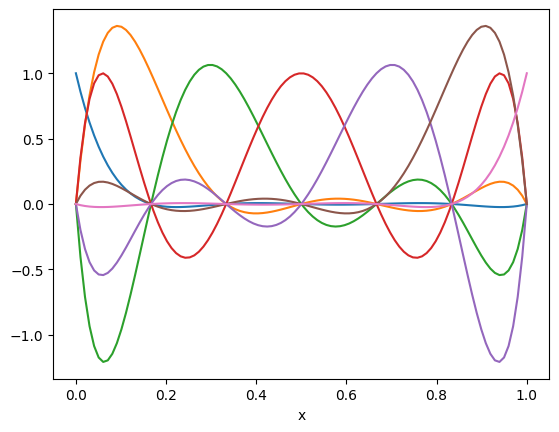

In [222]:
function LagrangePolynomials(s)
    n = length(s)
    d = n-1
    L = []
    for i in 1:n
        scaler = 1/(prod([(s[i]-s[k]) for k in 1:n if k != i]))
        Lk = scaler * MyPoly(roots = [s[m] for m in 1:n if m != i])
        push!(L,Lk)
    end
    return L
end

Ls = LagrangePolynomials((0:6) / 6)
plot.(Ls, Ref([0,1]));


In [225]:
# Test Case
s = (0:6) / 6
scaler = 1/(prod([(s[1]-s[k]) for k in 1:7 if k != 1]))
Lk =  scaler*MyPoly(roots = [s[m] for m in 1:7 if m != 1])
Lk(s[1])

0.9999999999999999

#### Problem 2(b)

In [227]:
function mkM(Ls)
    n = length(Ls)
    M = zeros(n,n)
    for i in 1:n
        for j in 1:n
            Lk = integrate(Ls[i]*Ls[j])
            M[i,j] = Lk(1)-Lk(0)
        end
    end
    return M
end

function mkK(Ls)
    n = length(Ls)
    M = zeros(n,n)
    for i in 1:n
        for j in 1:n
            Lk = integrate(differenciate(Ls[i])*differenciate(Ls[j]))
            M[i,j] = Lk(1)-Lk(0)
        end
    end
    return M
end

mkK (generic function with 1 method)

In [228]:
d = 4
Ls = LagrangePolynomials((0:d) // d)
M = mkM(Ls)
K = mkK(Ls)
display(Ls)
display(M)
display(K)

5-element Vector{Any}:
 MyPoly(32//3⋅x^4 - 80//3⋅x^3 + 70//3⋅x^2 - 25//3⋅x + 1//1)
 MyPoly(-128//3⋅x^4 + 96//1⋅x^3 - 208//3⋅x^2 + 16//1⋅x)
 MyPoly(64//1⋅x^4 - 128//1⋅x^3 + 76//1⋅x^2 - 12//1⋅x)
 MyPoly(-128//3⋅x^4 + 224//3⋅x^3 - 112//3⋅x^2 + 16//3⋅x)
 MyPoly(32//3⋅x^4 - 16//1⋅x^3 + 22//3⋅x^2 - 1//1⋅x)

5×5 Matrix{Float64}:
  0.0514991    0.0522046   -0.0306878   0.00987654  -0.00511464
  0.0522046    0.316049    -0.0677249   0.0451499    0.00987654
 -0.0306878   -0.0677249    0.330159   -0.0677249   -0.0306878
  0.00987654   0.0451499   -0.0677249   0.316049     0.0522046
 -0.00511464   0.00987654  -0.0306878   0.0522046    0.0514991

5×5 Matrix{Float64}:
  5.21164    -7.24656    3.2254   -1.55767   0.367196
 -7.24656    17.6085   -15.0349    6.23069  -1.55767
  3.2254    -15.0349    23.619   -15.0349    3.2254
 -1.55767     6.23069  -15.0349   17.6085   -7.24656
  0.367196   -1.55767    3.2254   -7.24656   5.21164